**Анализ гипотез в интернет магазине**
Есть перечень гипотез для увеличения выручки. Необходимо приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты. 

**Цель исследования** — принять решение по результатам А/В теста (остановить или продолжить).

**Ход исследования**

Данные для исследования находятся в трех файлах:  
`/datasets/hypothesis.csv` - здесь находится информация о гипотезах  
`/datasets/orders.csv` - в этом файле размешены результаты А/В теста с информацией о заказах  
`/datasets/visitors.csv` - информация о результатах А/В теста в части пользователей.  

Исследование будет разделено на 2 части. 
В первой части мы приоритизируем гипотезы используя фреймворки ICE и RICE. Также обьясним изменения приоритезации гипотез, произошедших при использовании фреймворка RICE.
Во второй части проведем анализ А/В теста. В этой части мы построим несколько графиков (кумулятивности и точечные графики) с использованием различных параметров (средний чек, среднее количество заказов и т.д.). Посчитаем 95-й и 99-й перцентили и статистическую значимость. Сделаем выводы которые помогут нам принять решение по судьбе теста : 
1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.


Таким образом, исследование пройдёт в 3 этапа:
 1. Подготовка данных.
 2. Приотизация гипотез.
 3. Проведение анализа А/В теста.


In [ ]:
# загрузим необходимые библиотеки

import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import datetime as dt
import numpy as np

## Начнем подготовку данных

In [ ]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv', sep=',')
orders = pd.read_csv('/datasets/orders.csv', sep=',')
visitors = pd.read_csv('/datasets/visitors.csv', sep=',')

In [ ]:
pd.options.display.max_colwidth = 130
hypothesis.head(10)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [ ]:
orders.head(10)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


In [ ]:
visitors.head(10)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


In [ ]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [ ]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [ ]:
# вижу что нет пропусков, проверю на дубликаты быстро и перейду к приведению типов в соответствие. 
hypothesis.duplicated().sum()

0

In [ ]:
orders.duplicated().sum()

0

In [ ]:
visitors.duplicated().sum()

0

In [ ]:
# дубликатов тоже нет, приведу в датасетах orders и visitirs столбец date к типу datetime

orders['date'] = orders['date'].astype('datetime64[ns]')
visitors['date'] = visitors['date'].astype('datetime64[ns]')

**Результаты подготовки**  
Данные просмотрели, дубликатов и пропусков нет. Типы данных на datetime64[ns] изменили в столбцах date у датасетов orders и visitors. Теперь перейдем к части 2 и будем приоритизировать гипотезы. 

## Приступим к приоритизации гипотез

In [ ]:
# сначала используем фреймворк ice
hypothesis['Ice'] = hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']
round(hypothesis[['Hypothesis', 'Ice']].sort_values(by='Ice', ascending=False), 2)

,Hypothesis,Ice
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


In [ ]:
hypothesis['Rice'] = (hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']
hypothesis[['Hypothesis', 'Rice']].sort_values(by='Rice', ascending=False)

,Hypothesis,Rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


**Вывод**  
При использовании Ice приоритетными были гипотезы 8, 0 и 7. После применения фреймворка Rice расстановка поменялась и на первом месте стала 7 гипотеза, на второе - 2 и на третьем - 0. 
Изменения очевидны поскольку при расчете Rice используется дополнительный параметр Reach, который означает скольких пользователй затронет изменение. По моему мнению следует опираться на приоритизацию через Rice, поскольку пользователи это ключевой фактор для любого бизнеса и не учитывать их "мнение" нельзя. Поэтому я предлагаю приоритет отдать 7 гипотезе и далее по перечню. 

## Переходим к 3 части : анализ A/B теста.

In [ ]:
# берем уникальные значения дат и групп
datesGroups = orders[['date','group']].drop_duplicates()

In [ ]:
# формируем кумулятивные значения
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], 
                                                                     orders['group'] == x['group'])]
                                     .agg({'date' : 'max', 
                                           'group' : 'max', 
                                           'transactionId' : 'nunique', 
                                           'visitorId' : 'nunique', 
                                           'revenue' : 'sum'}), 
                                     axis=1).sort_values(by=['date','group'])

visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], 
                                                                         visitors['group'] == x['group'])]
                                       .agg({'date' : 'max', 
                                             'group' : 'max', 
                                             'visitors' : 'sum'}),
                                       axis=1).sort_values(by=['date','group'])

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.head(5)

,date,group,transactionId,visitorId,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


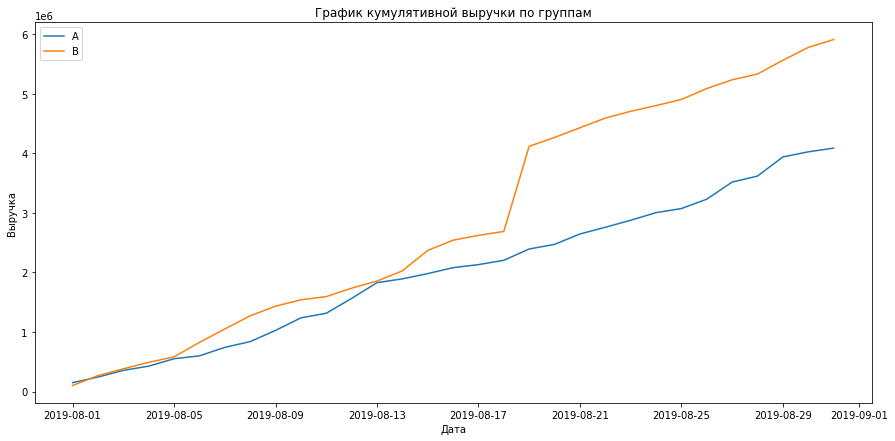

In [ ]:
# cтроим первый график кумулятивной выручки по группам
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'transactionId']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'transactionId']]

plt.figure(figsize=(15,7))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.ylabel('Выручка')
plt.xlabel('Дата')
plt.title('График кумулятивной выручки по группам')
plt.legend()
plt.show()

**Вывод**  
Судя по графику выручка растет постоянно. 
Исходя из графика видно, что первые 5 дней обе группы шли одинаково, но потом группа "А" начала отставать. 13 августа группа "А" догнала группу "В", но так и не смогла опередить. Еще 17 августа у группы "В" произошел резкий скачек выручки вверх, это может быть увеличение количества заказов или выбросы. Посмотрим на следующих графиках. 

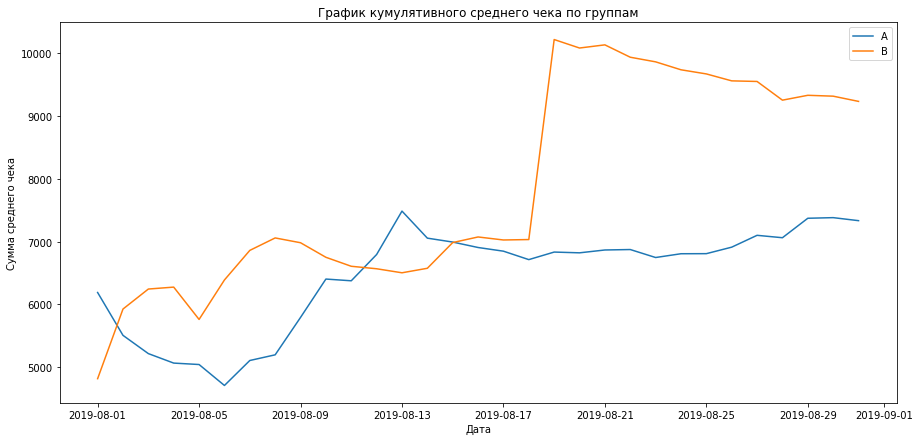

In [ ]:
# построим график кумулятивного среднего чека по группам
plt.figure(figsize=(15,7))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['transactionId'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['transactionId'], label='B')
plt.ylabel('Сумма среднего чека')
plt.xlabel('Дата')
plt.title('График кумулятивного среднего чека по группам')
plt.legend() 
plt.show()

**Вывод**  
На этом графике мы также видим эту аномалию 17 октября. Средний чек у группы "В" резко вырос в этот день. Что касается группы "А", то 13 августа как раз в день когда группа "А" максимально приблизилась к группе "В" по выручке тоже присутствует резкий скачек выручки. Скорее всего пришел крупный заказ, который на это повлиял. В последующих днях после 21 авгуса средний чек у обеих групп переходит в плавное стабильное направление (причем у группы "В" он снижается). 

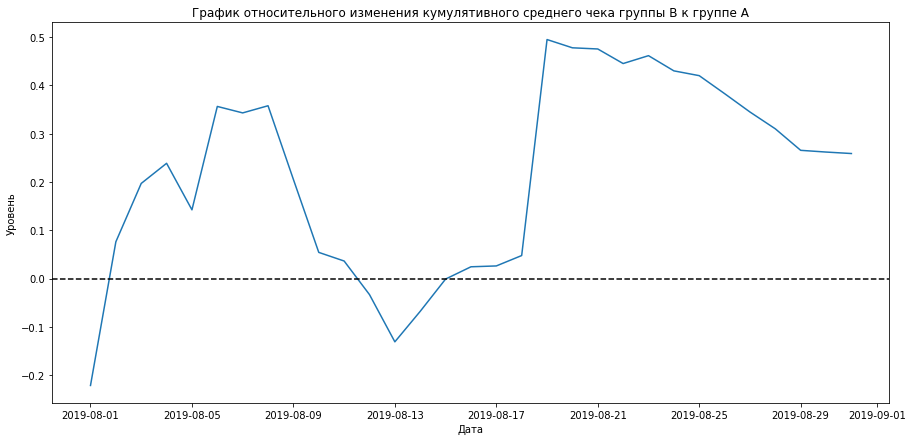

In [ ]:
# Теперь построим график относительного изменения кумулятивного среднего чека группы B к группе A.
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, 
                                                   left_on='date', 
                                                   right_on='date', 
                                                   how='left', 
                                                   suffixes=['A', 'B'])
plt.figure(figsize=(15,7))
plt.plot(mergedCumulativeRevenue['date'], 
         (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['transactionIdB'])
         /(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['transactionIdA'])-1)
plt.axhline(y=0, color='black', linestyle='--') 
plt.ylabel('Уровень')
plt.xlabel('Дата')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.show()

**Вывод**  
На графике видны резкие скачки, причем в те же дни, что мы уже отметили. Предположу, что у нас точно присутствуют аномалии и выбросы.

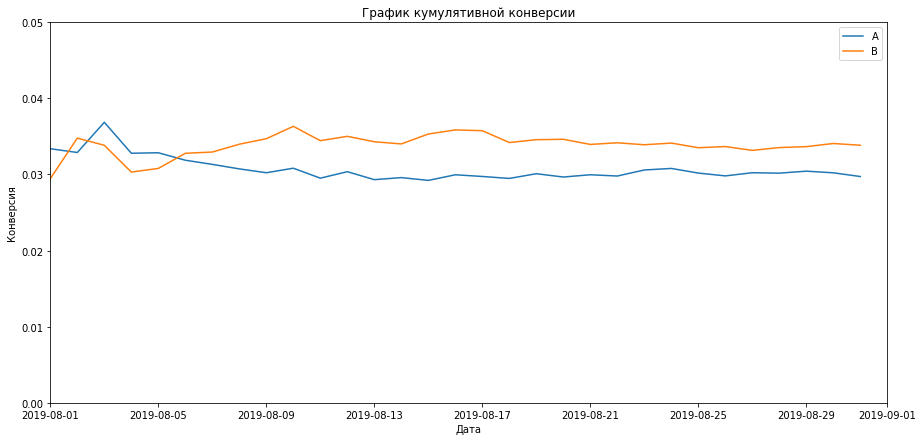

In [ ]:
# Переходим к построению графика кумулятивной конверсии.

cumulativeData['conversion'] = cumulativeData['transactionId']/cumulativeData['visitors']

cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.figure(figsize=(15,7))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.ylabel('Конверсия')
plt.xlabel('Дата')
plt.title('График кумулятивной конверсии')
plt.legend() 

plt.axis([dt.datetime.strptime('2019-08-01', '%Y-%m-%d'), dt.datetime.strptime('2019-09-01', '%Y-%m-%d'), 0, 0.05])
plt.show()


**Вывод**  
Линии плавные, но видны постоянные скачки вначале до 13 августа. Потом конверсия группы "А" пошла вниз, а конверсия группы "В" наоборот вышла на уровень 36% и дальше оставалась в диапазоне 34-35%.

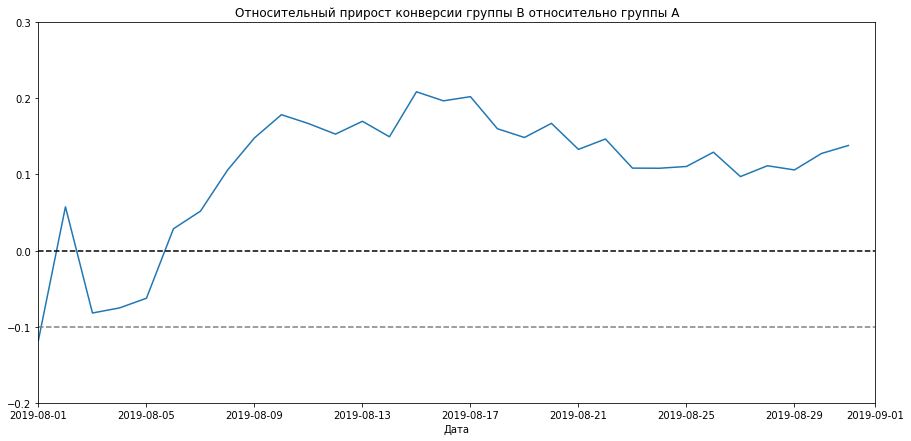

In [ ]:
# строим график относительного различия кумулятивных конверсий
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], 
                                       left_on='date', 
                                       right_on='date', 
                                       how='left', 
                                       suffixes=['A', 'B'])

plt.figure(figsize=(15,7))
plt.plot(mergedCumulativeConversions['date'], 
         mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)
plt.title('Относительный прирост конверсии группы B относительно группы A')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.xlabel('Дата')
plt.axis([dt.datetime.strptime('2019-08-01', '%Y-%m-%d'), dt.datetime.strptime('2019-09-01', '%Y-%m-%d'), -0.2, 0.3])
plt.show()


**Вывод**  
Конверсия группы "В" выигрывает и даже при начальном резком падении достаточно быстро восстанавливается и переходит в рост. График коррелирует с предыдущим. 

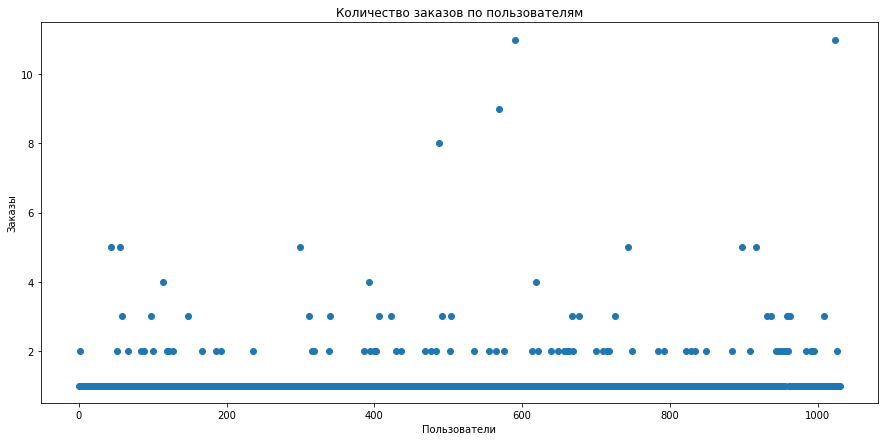

In [ ]:
# Переходим к построению точечного графика количества заказов по пользователям.
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsers.columns = ['userId', 'orders']

x_values = pd.Series(range(0,len(ordersByUsers)))
plt.figure(figsize=(15,7))
plt.scatter(x_values, ordersByUsers['orders']) 
plt.ylabel('Заказы')
plt.xlabel('Пользователи')
plt.title('Количество заказов по пользователям')
plt.show()


**Вывод**  
Судя по графику большинство пользователей делали заказ один раз. Но также присутствует достаточно большая доля тех, кто делал 2 заказа. Чуть ниже с теми кто уже делал заказ 3 раза. Нужно посмотреть в персинтилях. 

In [ ]:
# посчитаем перцинтили количества заказов на пользователя.
np.percentile(ordersByUsers['orders'], [95, 99])

array([2., 4.])

**Вывод**  
Только 5% делают более 2-х заказов и 1% более 4. Предалгаю опеределить верхнюю границу 2-мя заказами. 

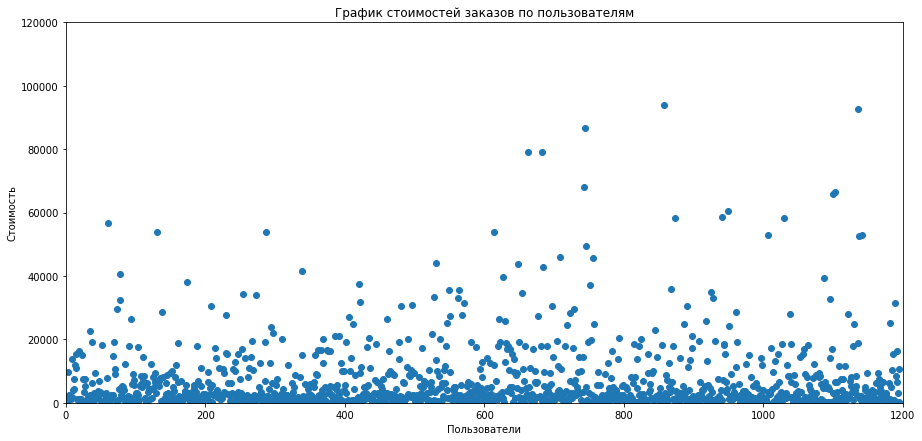

In [ ]:
# строим точечный график стоимостей заказов

x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(15,7))
plt.scatter(x_values, orders['revenue'])
plt.ylabel('Стоимость')
plt.xlabel('Пользователи')
plt.title('График стоимостей заказов по пользователям')
plt.axis([0, 1200, 0, 120000])
plt.show()

**Вывод**  
Судя по графику подавляющие число заказов стоит до 20000. Дороже уже меньше, но есть и дорогие заказы в диапазоне от 80000 до 100000. Давайте посмотрим на перцентили.

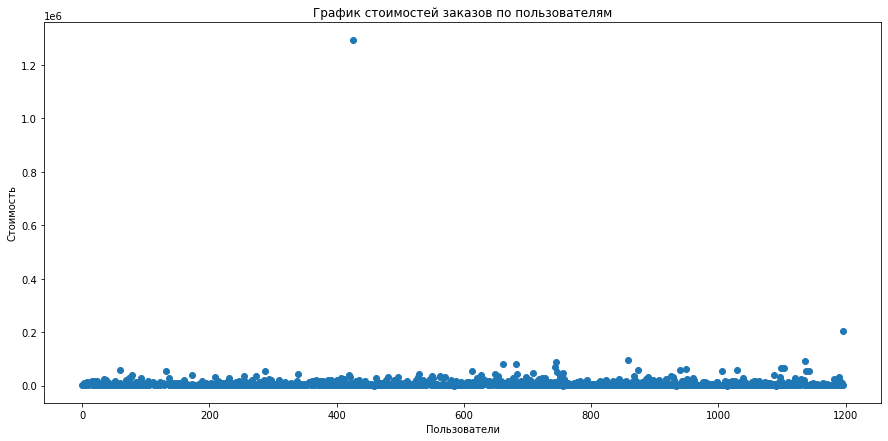

In [ ]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(15,7))
plt.scatter(x_values, orders['revenue'])
plt.ylabel('Стоимость')
plt.xlabel('Пользователи')
plt.title('График стоимостей заказов по пользователям')

plt.show()

In [ ]:
# посчитаем перцинтили стоимостей заказов на пользователя.
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

**Вывод**  
Все оказалось даже еще проще. Только 5% пользователей платят более 28000 за заказы. И 1% более 58000.  
Таким образом предлагаю признать аномальными заказы стоимостью выше 28 000. 

In [ ]:
# Переходим к расчету статистической значимости различий в среднем количестве заказов между группами по «сырым» данным.
# Для этого сформирую таблицу со всеми необходимыми данными в один датасет для работы как это было в тренажере,
# далее создадим два столбца в которые вложим заказы и создадим две переменные (выборки) в которых у нас будут соттветствие
# пользователей и количество заказов из разных групп. 

visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}), axis=1,)

visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}),axis=1,)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'}))

ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}), axis=1,).sort_values(by=['date'])

ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA',]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'}))

ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}),axis=1,).sort_values(by=['date'])

ordersBCummulative.columns = ['date','ordersCummulativeB','revenueCummulativeB',]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left')
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ), name='orders',),],axis=0,)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0,index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),name='orders',),],axis=0,)


###### Прежде чем перейти к расчету статистической значимости выведем гипотезу:  
###### Н0: Разница между количеством заказов у групп "А" и "В" статистически не значима.  
###### Н1: Разница между группами "А" и "В" по количеству заказов статистически значима.

In [ ]:
# считаю стат.значимость по количеству заказов по "сырым" данным. Для проверки использую метод Манна-Уитни.
alpha = 0.05
result = stats.mannwhitneyu(sampleA, sampleB)
print('PValue:', "{0:.3f}".format(result.pvalue))
if result.pvalue < alpha:
    print('Разница между группами статистически значима.')
else:
    print('Статистически значимых различий по количеству заказов между группами нет.')

PValue: 0.017
Разница между группами статистически значима.


In [ ]:
print('Прирост группы "В" относительно группы "А":', "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

Прирост группы "В" относительно группы "А": 0.138


**Вывод**  
Исходя из полученного результата можно точно увидеть, что статистическая разница между группами присутствует. Второе число нам показало прирост группы "В" на 13% над группой "А". 

###### Выведем гипотезу:  
###### Н0: Разница между средним чеком в заказе у групп "А" и "В" статистически не значима.  
###### Н1: Разница между группами "А" и "В" по среднему чеку заказов статистически значима.

In [ ]:
# Считаю статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. 
# Для проверки использую метод Манна-Уитни.
alpha = 0.05
result = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])
print('PValue:', "{0:.3f}".format(result.pvalue))
if result.pvalue < alpha:
    print('Разница между группами статистически значима.')
else:
    print('Статистически значимых различий в среднем чеке заказа между группами нет.')

PValue: 0.729
Статистически значимых различий в среднем чеке заказа между группами нет.


In [ ]:
print('Прирост группы "В" относительно группы "А":',
      '{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/
                       orders[orders['group']=='A']['revenue'].mean()-1))

Прирост группы "В" относительно группы "А": 0.259


**Вывод**  
В среднем чеке же наоборот, статистических различий не обнаружено между группами, но виден довольно большой прирост группы "В" на 25% (почти на 26%). 

**Очистка**  
Выше в нашем исследовании мы выяснили, что большинство пользователей делает 2 и менее заказов, а сумма одной покупки в большинстве случаев не более 28000. Я очищу данные от аномальных пользователей, у которых количество заказов и сумма выше указанных цифр.

In [ ]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],
                                 ordersByUsersB[ordersByUsersB['orders'] > 2]['userId'],],axis=0,)

usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']

abnormalUsers = (pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
                 .drop_duplicates()
                 .sort_values())
print('Количество аномальных пользователей:', len(abnormalUsers))

sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],
                             pd.Series(0,index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
                                                        ), name='orders',),], axis=0,)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],
                             pd.Series(0,index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
                                                        ), name='orders',),], axis=0,)

Количество аномальных пользователей: 74


###### Выведем гипотезу:  
###### Н0: Разница между количеством заказов у групп "А" и "В" по "очищенным" данным статистически не значима.  
###### Н1: Разница между группами "А" и "В" по количеству заказов по "очищенным" данным статистически значима.

In [ ]:
# переходим к расчету статистической значимости различий в среднем количестве заказов между группами по «очищенным» данным. 
# Для проверки использую метод Манна-Уитни.
alpha = 0.05
result = stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)
print('PValue:', "{0:.3f}".format(result.pvalue))
if result.pvalue < alpha:
    print('Разница между группами статистически значима.')
else:
    print('Статистически значимых различий в среднем количестве заказов между группами нет.')

PValue: 0.013
Разница между группами статистически значима.


In [ ]:
print('Прирост группы "В" относительно группы "А":', '{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

Прирост группы "В" относительно группы "А": 0.173


**Вывод**  
Равно как и по "сырым" данным, так и по "очищенным" мы находим статистически значимую разницу между группами, также видим прирост группы "В" относительно группы "А" на 17%. Я уже готов предположить, что нужно делать дальше с тестом и какой результат. Проведу сейчас расчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным и сделаю окончательный вывод.

###### Выведем гипотезу:  
###### Н0: Разница между средним чеком в заказе у групп "А" и "В" по «очищенным» данным статистически не значима.  
###### Н1: Разница между группами "А" и "В" по среднему чеку заказов по «очищенным» данным статистически значима.

In [ ]:
# расчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным
# Для проверки использую метод Манна-Уитни.
alpha = 0.05
result = stats.mannwhitneyu(orders[np.logical_and(orders['group'] == 'A',
                                   np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'],
                            orders[np.logical_and(orders['group'] == 'B',
                                   np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'],)
print('PValue:', "{0:.3f}".format(result.pvalue))
if result.pvalue < alpha:
    print('Разница между группами статистически значима.')
else:
    print('Статистически значимых различий в среднем чеке заказа между группами нет.')

PValue: 0.738
Статистически значимых различий в среднем чеке заказа между группами нет.


In [ ]:
print('Прирост группы "В" относительно группы "А":', "{0:.3f}".format(
                        orders[np.logical_and(orders['group'] == 'B',
                               np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'].mean()
                      / orders[np.logical_and(orders['group'] == 'A',
                               np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'].mean() - 1)
)

Прирост группы "В" относительно группы "А": -0.020


## Вывод:  
В начале нашей работы мы провели подготовку данных, посмотрели датасеты, проверили на пропуски, наличие дубликатов и корректность типов данных. Привели к типу datetime столбец date в таблицах orders и visitors.  
После этого приступили к приоритезации гипотез. Используя методы ICE и RICE мы определили , что во-первых в исследовании необходимо учитывать пользователя, поскольку всегда покупатель "голосует" рублем, а рубль = прибыль в бизнесе. Таким образом взяв за основу результат расчета по формуле RICE мы определили приоритетные гипотезы:  
1. 7 гипотеза  
2. 2 гипотеза  
3. 0 гипотеза  
После успешной приоритизации гипотез мы перешли к анализу результатов А/В теста. При использовании кумулятивных метрик мы построили граффики кумулятивной выручки по группам, кумулятивного среднего чека по группам, относительного изменения кумулятивного среднего чека группы B к группе A, кумулятивного среднего количества заказов по группам, относительного изменения кумулятивного среднего количества заказов группы B к группе A. Судя по этим графикам можно увидеть достаточно хорошие результаты группы "В" по сравнению с группой "А". На всех графиках группа "В" "побеждает".  
После построения точечных графиков по количеству и стоимости заказов мы выяснили, что большинство пользователей делает 2 и менее заказа, а сумма одной покупки в большинстве случаев не более 28000.  
С учетом полученных параметров мы провели расчеты статистической значимости различий в среднем количестве заказов и в среднем чеке заказа между группами вначале по "сырым", а затем по "очищенным" данным.  
По результам этих расчетов мы выяснили, что по среднему количеству заказов по "сырым" и по "очищенным" данным разница между группами "В" и "А" статистически значима, а прирост группы "В" составляет 17% и 13% соответственно.  
По среднему чеку же между группами ститистически значимых различий не обнаружено, но в "сырых" данных прирост группы "В" показывал 25%, а после очистки ушел в -2%. Этот расчет подтверждает наш график кумулятивного среднего чека, где был резкий скачок у группы "В". Видимо в этот момент произошел крупный заказ.  
Таким образом, если не брать во внимание расчет статистической значимости по среднему чеку (как я описал выше, он просто нам подтвердил теорию резкого скачка на графике кумулятивного среднего чека) на протяжении всего анализа по всем метрикам лидировала группа "В", а в конце все подтвердилось результатом расчета статистической значимости по количеству заказов. Поэтому моя рекомендация по итогу всего анализа это остановить тест и признать группу "В" победителем в этом исследовании. 